# IMDB Sentiment Analysis

In [ ]:
#For uploading the dataset using Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import pandas as pd
import re
import string
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression


In [ ]:
# Upload libraries from local
# Upload contractions.py and text_normalizer.py

import text_normalizer as tn



In [45]:
# Importing the dataset

data = pd.read_csv("/content/drive/MyDrive/IMDB-Dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [46]:
# Checking the shape of the data

data.shape

(50000, 2)

In [47]:
# Getting info about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [48]:
# Counting the number of unique values in the column

data['sentiment'].value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

In [49]:
# Getting the top 10 elements of the dataset

data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [50]:
# Cleaning the data first round

def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)

In [51]:
data['review']=pd.DataFrame(data.review.apply(cleaned1))

In [52]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [53]:
# Second round of cleaning

def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)

In [54]:
data['review']=pd.DataFrame(data.review.apply(cleaned2))
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [55]:
# Encoding Sentiment column

le = LabelEncoder()
data["sentiment"] = le.fit_transform(data["sentiment"])
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [56]:
# Assigning variables x and y for review and sentiment columns respectively

x = data.iloc[0:,0].values
y = data.iloc[0:,1].values

In [57]:
# Train and test splitting
# 35k (70%) for training and 15k (30%) for testing 

xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3,random_state = 225)

In [58]:
# Normalize datasets

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
norm_xtrain = tn.normalize_corpus(xtrain)
norm_xtest = tn.normalize_corpus(xtest)

In [60]:
# Build BOW features on train reviews

cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_xtrain)



In [61]:
# Transform test reviews into features

cv_test_features = cv.transform(norm_xtest)


In [62]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


BOW model:> Train features shape: (35000, 2196801)  Test features shape: (15000, 2196801)


In [63]:
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [64]:
# Logistic Regression model on BOW features


lr.fit(cv_train_features,ytrain)

# Predicting using model

predictions = lr.predict(cv_test_features) 

score = lr.score(cv_test_features,ytest)
print("Accuracy score:",np.round(score,2)*100,"%")


Accuracy score: 90.0 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Visualisation


In [65]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

Confusion matrix:


Text(0.5, 1.0, 'Accuracy Score: 90.0%')

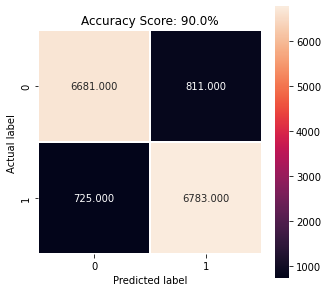

In [66]:
cm = metrics.confusion_matrix(ytest, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Confusion matrix:")
all_sample_title = 'Accuracy Score: {0}%'.format(np.round(score,2)*100)
plt.title(all_sample_title, size = 12)

In [67]:
print("Classification report\n")
print(classification_report(ytest, predictions))

Classification report

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7492
           1       0.89      0.90      0.90      7508

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

